<a href="https://colab.research.google.com/github/quangdad/DataMining/blob/main/HepatitisB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Tải bộ dữ liệu lên
data = pd.read_csv('patients.csv')
# Đặt tên cho các cột
data.columns = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig','LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'AlkPhosphate','SGOT', 'Albumin', 'Protime', 'Histology']

In [ ]:
data.head(10)

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1
5,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
6,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1,?,?,?,?,1
7,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,?,48,4.4,?,1
8,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1,?,120,3.9,?,1
9,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           3585 non-null   int64 
 1   Age             3585 non-null   int64 
 2   Sex             3585 non-null   int64 
 3   Steroid         3585 non-null   object
 4   Antivirals      3585 non-null   int64 
 5   Fatigue         3585 non-null   object
 6   Malaise         3585 non-null   object
 7   Anorexia        3585 non-null   object
 8   LiverBig        3585 non-null   object
 9   LiverFirm       3585 non-null   object
 10  SpleenPalpable  3585 non-null   object
 11  Spiders         3585 non-null   object
 12  Ascites         3585 non-null   object
 13  Varices         3585 non-null   object
 14  Bilirubin       3585 non-null   object
 15  AlkPhosphate    3585 non-null   object
 16  SGOT            3585 non-null   object
 17  Albumin         3585 non-null   object
 18  Protime 

In [ ]:
with open('missing_rows.txt', 'a') as f:
    print("Các mẫu bị thiếu thông số:", file=f)
    for i, row in data.isin(['?']).any(axis=1).iteritems():
        if row == True:
            print(f"Mẫu {i+1}:", file=f)
            print(data.iloc[[i]], file=f)


In [2]:
data = data.replace('?', np.nan).dropna()

In [5]:
# Điền giá trị thiếu bằng giá trị trung bình của cột
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [3]:
#chuyển dữ liệu các cột sang dạng số
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 4 to 3584
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           1936 non-null   int64  
 1   Age             1936 non-null   int64  
 2   Sex             1936 non-null   int64  
 3   Steroid         1936 non-null   int64  
 4   Antivirals      1936 non-null   int64  
 5   Fatigue         1936 non-null   int64  
 6   Malaise         1936 non-null   int64  
 7   Anorexia        1936 non-null   int64  
 8   LiverBig        1936 non-null   int64  
 9   LiverFirm       1936 non-null   int64  
 10  SpleenPalpable  1936 non-null   int64  
 11  Spiders         1936 non-null   int64  
 12  Ascites         1936 non-null   int64  
 13  Varices         1936 non-null   int64  
 14  Bilirubin       1936 non-null   float64
 15  AlkPhosphate    1936 non-null   int64  
 16  SGOT            1936 non-null   int64  
 17  Albumin         1936 non-null   f

In [ ]:
data.head(10)

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
9,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1
10,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.7,54,1
11,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1
12,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
14,2,38,1,1,2,1,1,1,2,2,2,2,1,2,2.0,72,89,2.9,46,1
16,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
17,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
18,2,38,1,1,1,2,2,2,1,1,2,2,2,2,0.7,70,28,4.2,62,1
19,2,22,2,2,1,1,2,2,2,2,2,2,2,2,0.9,48,20,4.2,64,1


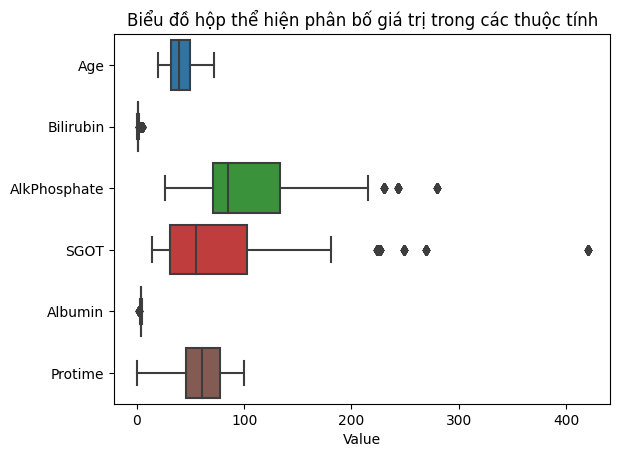

In [5]:
# Chọn cột số
numerical_cols = ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']

# Tạo biểu đồ hộp gồm các cột số
sns.boxplot(data=data[numerical_cols], orient='h')

# Thêm nhãn và tiêu đề
plt.xlabel('Value')
plt.title('Biểu đồ hộp thể hiện phân bố giá trị trong các thuộc tính')
plt.show()


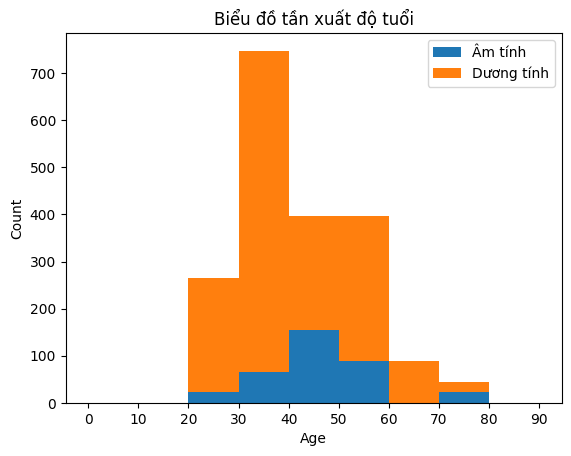

In [7]:
# Tạo biểu đồ Tuổi theo Lớp
plt.hist([data[data['Class'] == 1]['Age'], data[data['Class'] == 2]['Age']], bins=range(0, 100, 10), stacked=True)

# Thêm nhãn và tiêu đề
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(0, 100, 10))
plt.title('Biểu đồ tần xuất độ tuổi')

# Thêm chú thích
plt.legend(['Âm tính', 'Dương tính'])
plt.show()

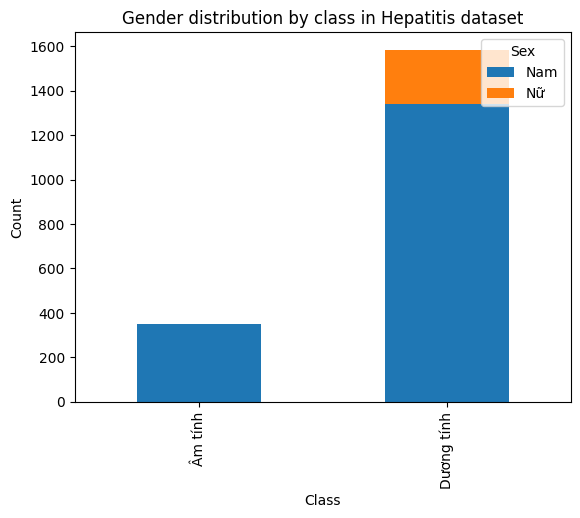

In [9]:
# Lọc và tính số lượng mẫu theo class và giới tính
class_count = data.groupby('Class').size()
sex_count = data.groupby(['Class', 'Sex']).size().unstack()

# Đổi tên nhãn
sex_count = sex_count.rename(columns={1: 'Nam', 2: 'Nữ'})
sex_count.index = ['Âm tính', 'Dương tính']

# Vẽ biểu đồ barchart
sex_count.plot(kind='bar', stacked=True)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Gender distribution by class in Hepatitis dataset')
plt.legend(title='Sex', loc='upper right')
plt.show()


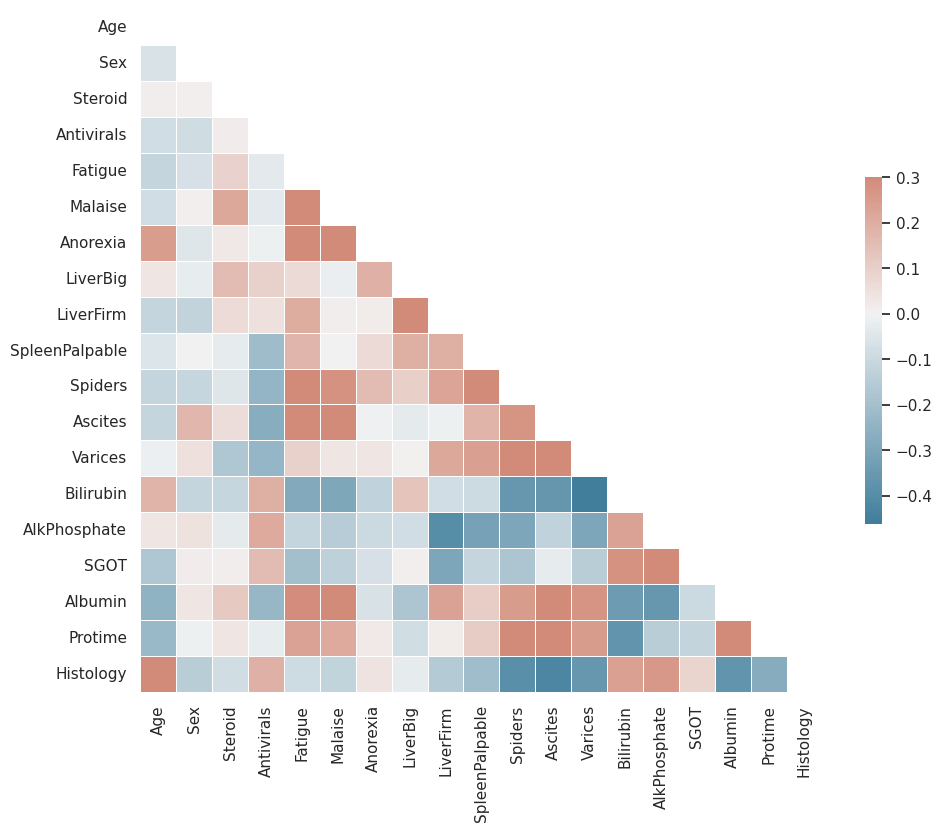

In [9]:
# Chuẩn hóa dữ liệu các thuộc tính số
numeric_columns = ['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime', 'Histology']
scaler = StandardScaler()

# Vẽ biểu đồ tương quan giữa các thuộc tính
sns.set(style="white")
corr = data.drop('Class', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [10]:
# Thêm thuộc tính mới 'LiverQuality' - Chất lượng gan
def liver_quality(row):
    if float(row['Bilirubin']) > 1.2 and float(row['Albumin']) < 3.5:
        return 0 # Kém
    else:
        return 1 # Tốt


data['LiverQuality'] = data.apply(liver_quality, axis=1)

In [11]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data.drop(['Class', 'LiverQuality'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Tạo mô hình Decision Tree và huấn luyện trên tập huấn luyện
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

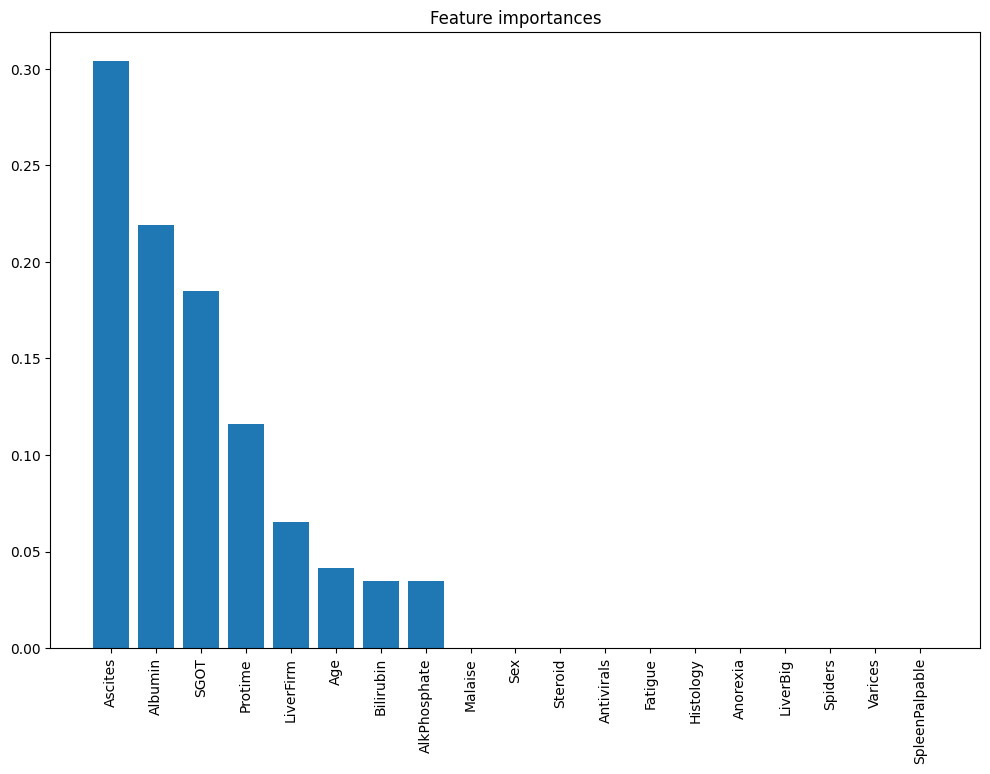

In [13]:

importances = dt_model.feature_importances_

# Sắp xếp các đặc trưng theo độ quan trọng giảm dần
indices = np.argsort(importances)[::-1]

# Vẽ biểu đồ cột để hiển thị độ quan trọng của các đặc trưng
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

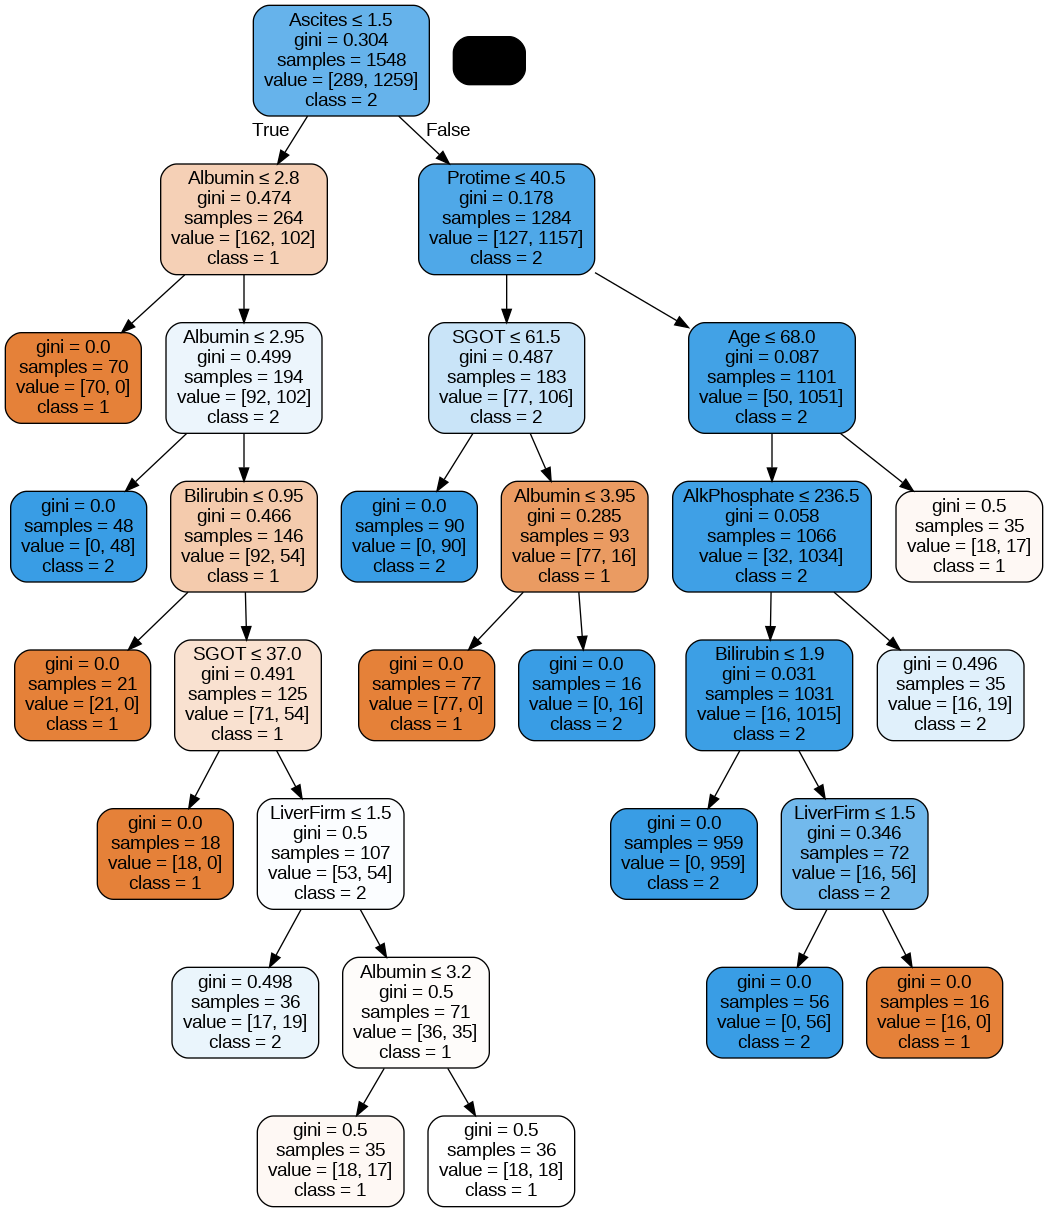

In [14]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(dt_model, out_file=None, 
                           feature_names=X_train.columns.tolist(),  
                           class_names=['1', '2'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [15]:
# Tạo mô hình Random Forest và huấn luyện trên tập huấn luyện
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

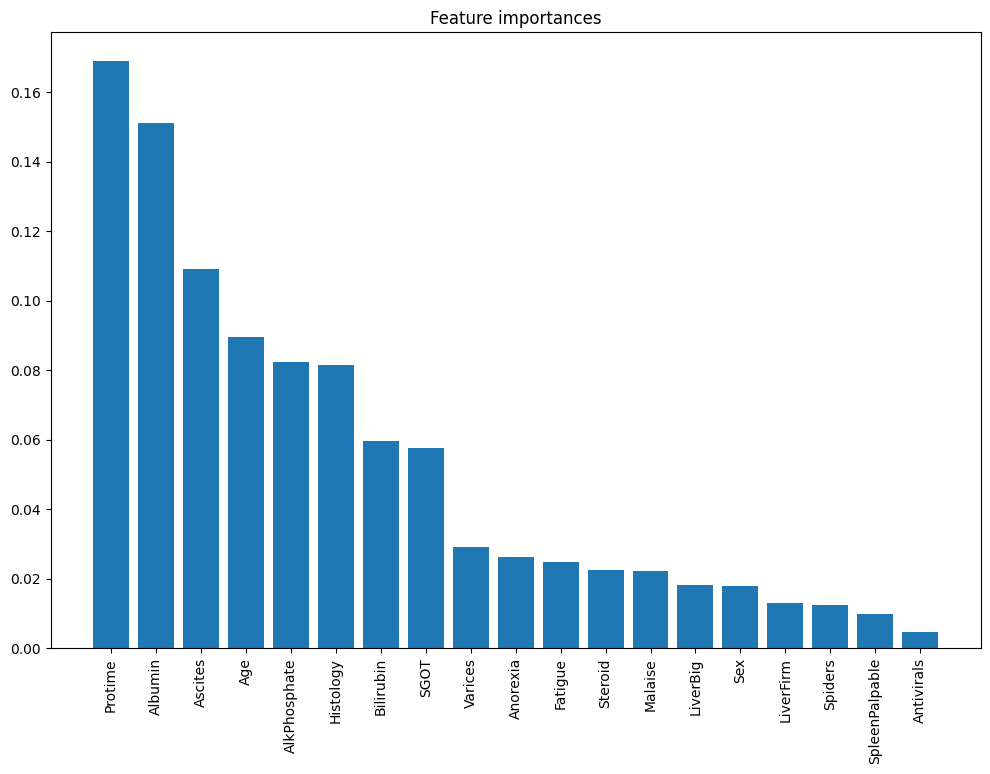

In [16]:
# Lấy đặc trưng quan trọng từ mô hình
importances = rf_model.feature_importances_

# Sắp xếp các đặc trưng theo độ quan trọng giảm dần
indices = np.argsort(importances)[::-1]

# Vẽ biểu đồ cột để hiển thị độ quan trọng của các đặc trưng
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

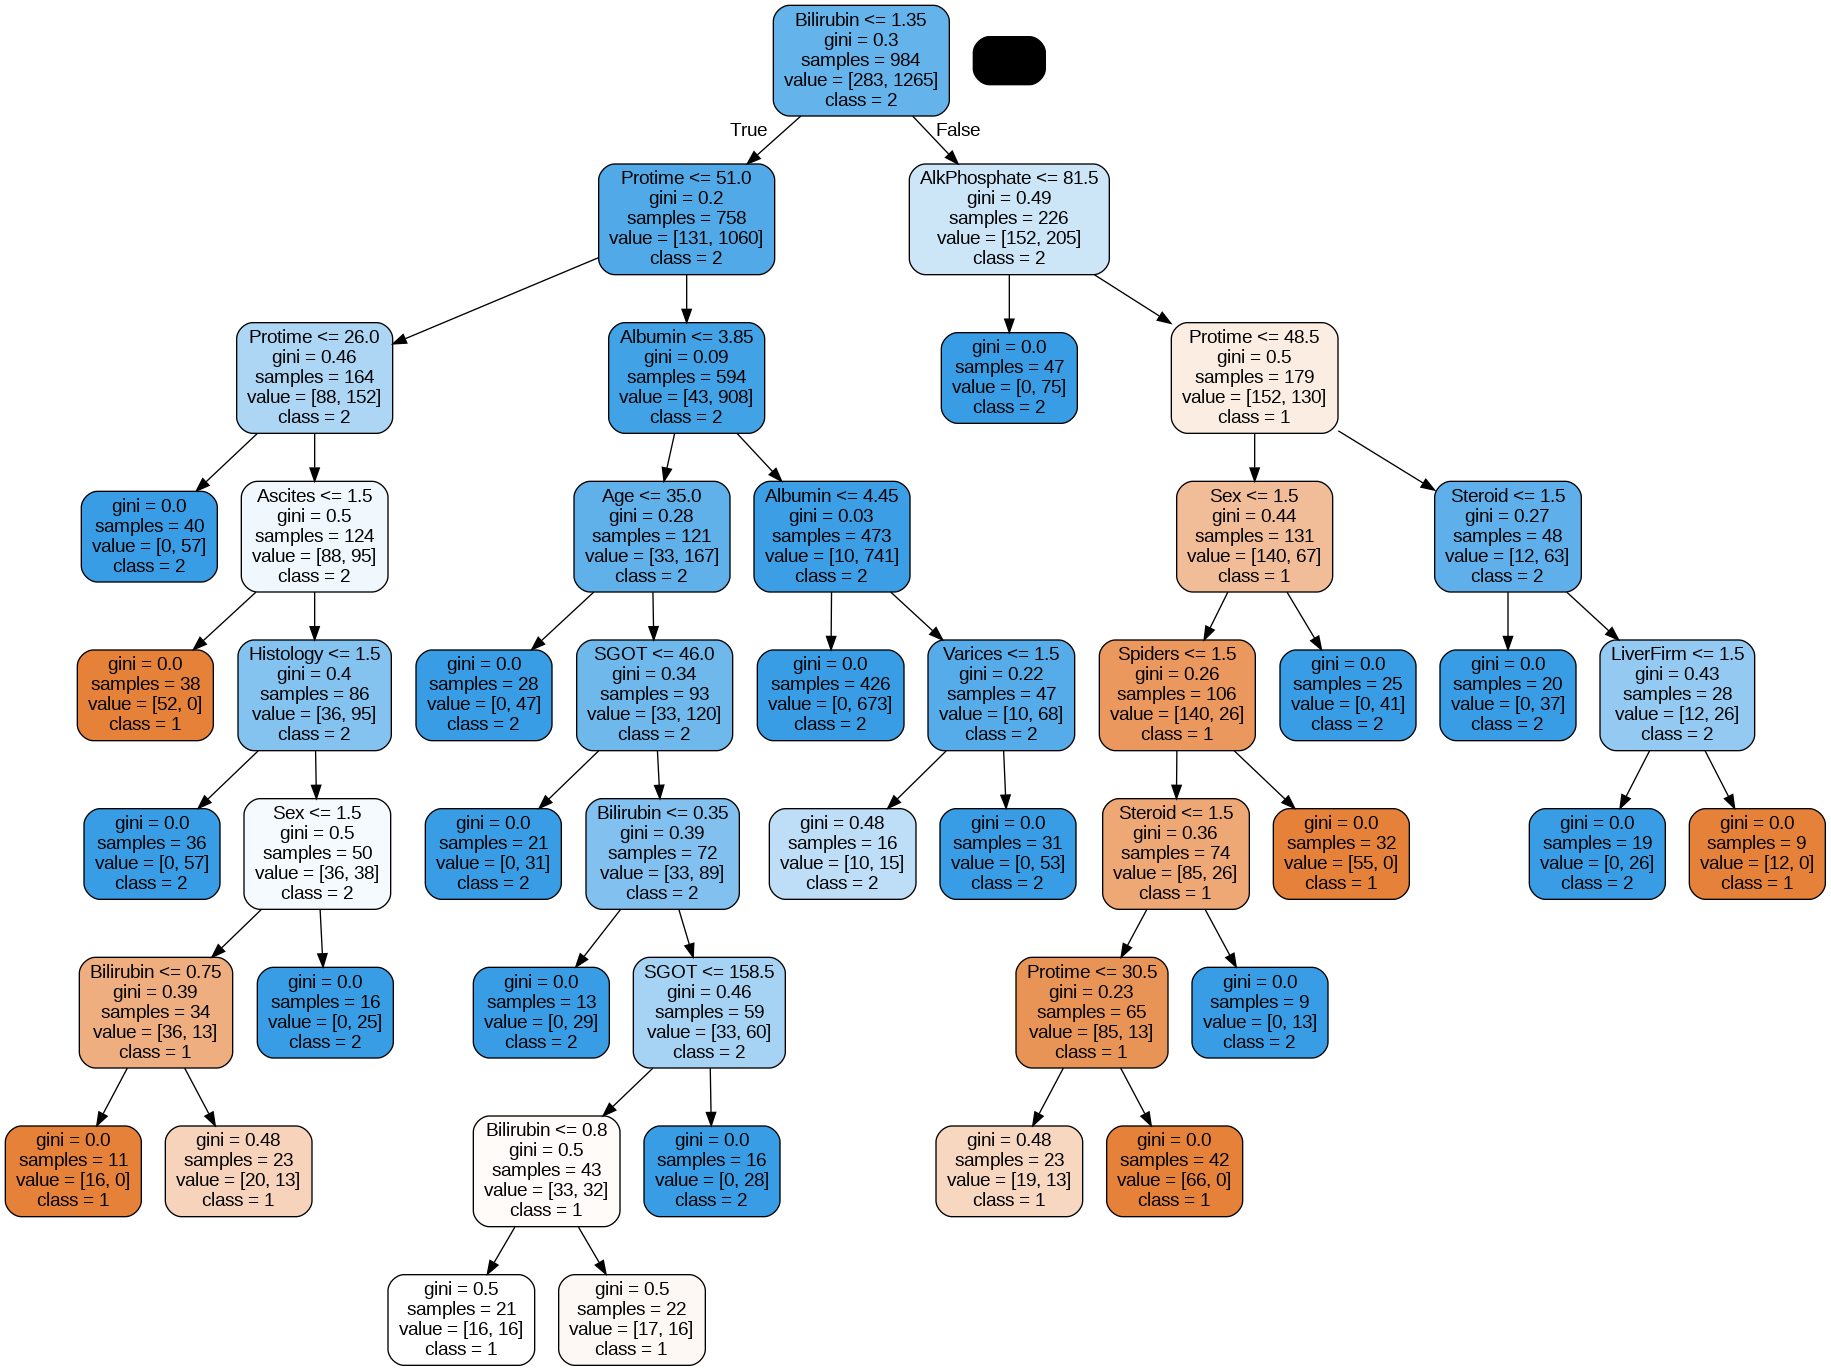

In [17]:
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
features = data.columns
# trích xuất cây đầu tiên từ mô hình Random Forest
tree = rf_model.estimators_[0]

# tạo file .dot từ cây quyết định
dot_data = export_graphviz(tree, out_file=None, 
                     feature_names = X_train.columns.tolist(),
                     class_names = ['1', '2'],
                     rounded = True, proportion = False, 
                     precision = 2, filled = True)

# tạo biểu đồ từ file .dot
graph = pydotplus.graph_from_dot_data(dot_data)

# hiển thị biểu đồ
Image(graph.create_png())
#Mô hình Random Forest trong hình được hình dung bao gồm 5 cây quyết định (decision trees) trong ensemble.

In [19]:
from sklearn.metrics import confusion_matrix
dt_y_pred = dt_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)

dt_confusion_matrix = confusion_matrix(y_test, dt_y_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

print('Decision Tree Confusion Matrix:\n', dt_confusion_matrix)
print('Random Forest Confusion Matrix:\n', rf_confusion_matrix)


Decision Tree Confusion Matrix:
 [[ 52  11]
 [ 14 311]]
Random Forest Confusion Matrix:
 [[ 48  15]
 [ 10 315]]


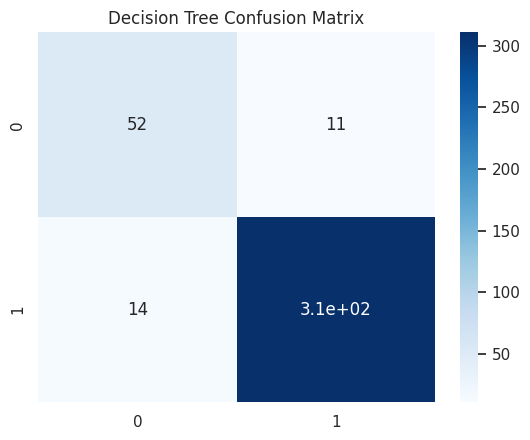

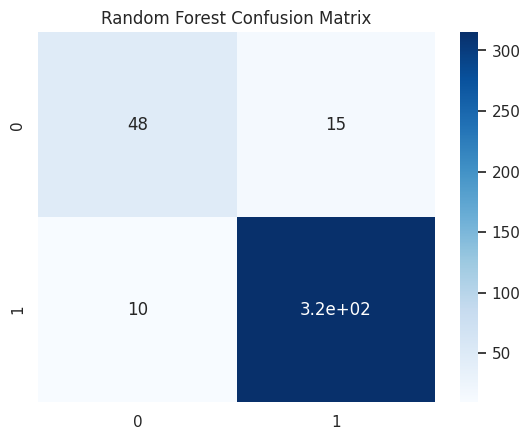

In [ ]:
import seaborn as sns

# Vẽ confusion matrix cho Decision Tree
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Vẽ confusion matrix cho Random Forest
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# tính toán True Positive, False Positive, True Negative và False Negative
tn, fp, fn, tp = dt_confusion_matrix.ravel()

# tính toán accuracy
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# tính toán precision
dt_precision = precision_score(y_test, dt_y_pred)

# tính toán recall
dt_recall = recall_score(y_test, dt_y_pred)

# tính toán f1-score
dt_f1 = f1_score(y_test, dt_y_pred)

rf_y_pred = rf_model.predict(X_test)

# Tính Accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Tính F1 score
rf_f1 = f1_score(y_test, rf_y_pred)

# Tính Recall
rf_recall = recall_score(y_test, rf_y_pred)

# Tính Precision
rf_precision = precision_score(y_test, rf_y_pred)

print("Decision Tree Accuracy:", dt_accuracy, ' ------------ Random Forest Accuracy:', rf_accuracy)
print("Decision Tree Precision:", dt_precision, ' ------------ Random Forest F1 score:', rf_f1)
print("Decision Tree Recall:", dt_recall, ' ------------ Random Forest Recall:', rf_recall)
print("Decision Tree F1-score:", dt_f1, ' ----------- Random Forest Precision:', rf_precision)


Decision Tree Accuracy: 0.9355670103092784  ------------ Random Forest Accuracy: 0.9355670103092784
Decision Tree Precision: 0.7878787878787878  ------------ Random Forest F1 score: 0.7933884297520662
Decision Tree Recall: 0.8253968253968254  ------------ Random Forest Recall: 0.7619047619047619
Decision Tree F1-score: 0.8062015503875969  ----------- Random Forest Precision: 0.8275862068965517


In [ ]:
dt_predictions = []
rf_predictions = []

for i in range(len(data)):
  sample = data.iloc[[i]]
  sample2 = data.iloc[[i]]
  dt_prediction = dt_model.predict(sample2.drop(['Class', 'LiverQuality'], axis=1))[0]
  rf_prediction = rf_model.predict(sample2.drop(['Class', 'LiverQuality'], axis=1))[0]
  liver_quality = 'tốt' if sample['LiverQuality'].values[0] == 1 else 'kém'
  if dt_prediction == 1:
    dt_predictions.append(f'Mẫu {i+1}: Không nhiễm viêm gan B, gan {liver_quality}')
  else:
    dt_predictions.append(f'Mẫu {i+1}: Bị nhiễm virus viêm gan B')
  if rf_prediction == 1:
    rf_predictions.append(f'Mẫu {i+1}: Không nhiễm viêm gan B, gan {liver_quality}')
  else:
    rf_predictions.append(f'Mẫu {i+1}: Bị nhiễm virus viêm gan B')

print('Kết quả chuẩn đoán của Decision Tree và Random Forest:')
for dt, rf in zip(dt_predictions, rf_predictions):
  print(f'Decision tree:',dt, ' -------- ','Random forest:', rf)

Kết quả chuẩn đoán của Decision Tree và Random Forest:
Decision tree: Mẫu 1: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 1: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 2: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 2: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 3: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 3: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 4: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 4: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 5: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 5: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 6: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 6: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 7: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 7: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 8: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 8: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 9: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 9: Bị nhiễm